# Importo base de datos procesada en SQL

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Procedo a cargar el file procesado donde tengo el desgloce de paises y categorias.
uploaded = files.upload()
csv_file_name = list(uploaded.keys())[0]
df_processed = pd.read_csv(csv_file_name)

Saving netflix_titles - raw_data_paises.csv to netflix_titles - raw_data_paises.csv


In [13]:
# Configuro del estilo de Matplotlib que utilizare mas adelante para los graficos.
plt.style.use('seaborn-v0_8-darkgrid')


## Filtro y proceso la base de datos

In [5]:
df_unique_titles = df_processed[df_processed['row_number'] == 1].copy()

# Procedo a separar el DataFrame en películas y series de TV para análisis mas específicos.
movies_df = df_unique_titles[(df_unique_titles['type'] == 'Movie') &
                             (df_unique_titles['duration_type'] == 'min') &
                             (df_unique_titles['duration_int'].notna())].copy()

tvshows_df = df_unique_titles[(df_unique_titles['type'] == 'TV Show') &
                              (df_unique_titles['duration_type'].str.contains('Season', na=False)) &
                              (df_unique_titles['duration_int'].notna())].copy()

Ahora genero nuevos DataFrames y obtengo tabla resumen con valores descriptivos.

In [12]:
# Análisis de Duración de Películas (en minutos)
movies_df_duration_desc = movies_df['duration_int'].describe()
movies_df_shortest_movie_title = movies_df.loc[movies_df['duration_int'].idxmin()]['title']
movies_df_longest_movie_title = movies_df.loc[movies_df['duration_int'].idxmax()]['title']

print("\nEstadísticas descriptivas de películas:")
print(movies_df_duration_desc)

# Análisis de Duración de Programas de TV (en temporadas)
tvshows_df_duration_desc = tvshows_df['duration_int'].describe()
tvshows_df_most_seasons_title = tvshows_df.loc[tvshows_df['duration_int'].idxmax()]['title']
tvshows_df_season_counts = tvshows_df['duration_int'].value_counts().sort_index()

print("\nEstadísticas descriptivas del número de temporadas:")
print(tvshows_df_duration_desc)


Estadísticas descriptivas de películas:
count    6132.000000
mean       99.566699
std        28.287511
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_int, dtype: float64

Estadísticas descriptivas del número de temporadas:
count    2677.000000
mean        1.764662
std         1.582525
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_int, dtype: float64


# Graficos del tipo Histograma para peliculas y series:

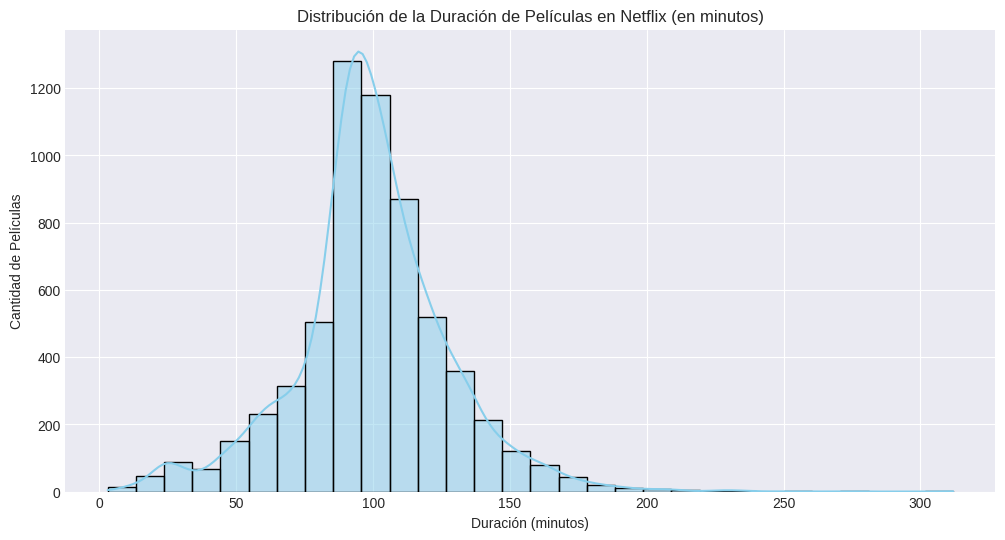

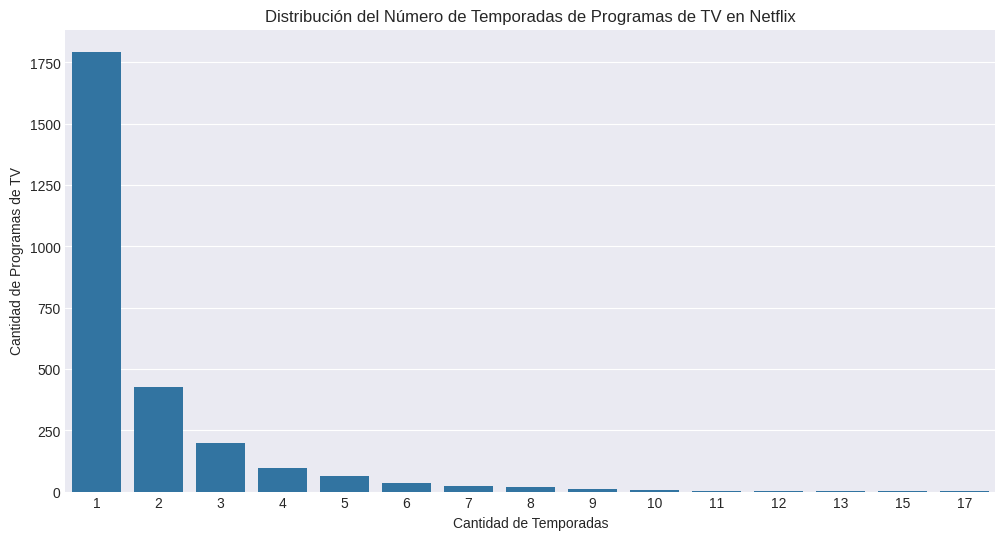

In [37]:
# Histograma de la duración de películas
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_int'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Duración de Películas en Netflix (en minutos)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de Películas')
plt.show()


# Gráfico de barras de la distribución del número de temporadas de programas de TV
plt.figure(figsize=(12, 6))
sns.countplot(x='duration_int', data=tvshows_df)
plt.title('Distribución del Número de Temporadas de Programas de TV en Netflix')
plt.xlabel('Cantidad de Temporadas')
plt.ylabel('Cantidad de Programas de TV')
plt.show()

## Graficos tipo Boxplots para Peliculas y TV Shows.

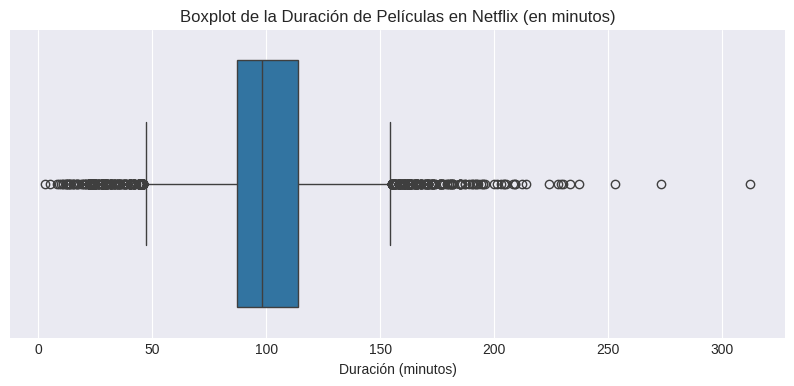

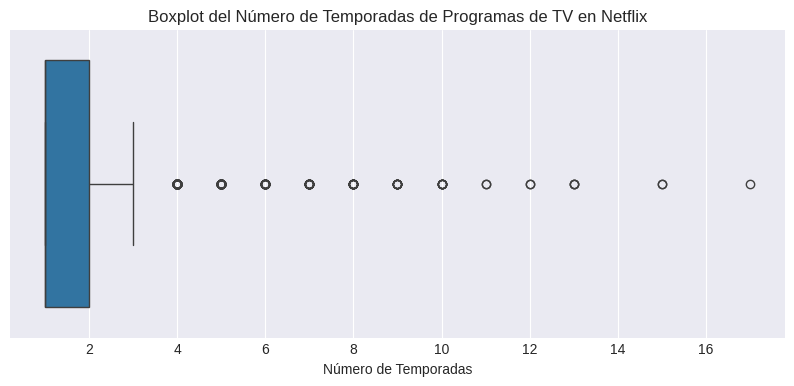

In [21]:
# Boxplot de la duración de películas
plt.figure(figsize=(10, 4))
sns.boxplot(x=movies_df['duration_int'])
plt.title('Boxplot de la Duración de Películas en Netflix (en minutos)')
plt.xlabel('Duración (minutos)')
plt.grid(True, axis='x')
plt.show()


# Boxplot del número de temporadas de programas de TV
plt.figure(figsize=(10, 4))
sns.boxplot(x=tvshows_df['duration_int'])
plt.title('Boxplot del Número de Temporadas de Programas de TV en Netflix')
plt.xlabel('Número de Temporadas')
plt.grid(True, axis='x')
plt.show()

## Analisis de la detección de Outliers para peliculas

-Analisis de Outliers para peliculas:

En el primer graficos de Boxplot se puede visualizar que si bien hay una distribucion aproximadamente simetrica, hay presencia de Outliers en ambos extremos. Ya que tenemos a la izquierda del bigote izquierdo varias observaciones que representan películas con duraciones muy cortas. Ocurre lo contrario a la derecha del bigote derecho, hay observaciones que representan películas con duraciones inusualmente largas. A continuacion procedo a mostrar los dos outliers mas extremos, sin embargo puedo identificar que no se trata de errores sino simplemente casos especiales.

In [23]:
movies_df_longest_movie_duration = movies_df['duration_int'].max()
movies_df_shortest_movie_duration = movies_df['duration_int'].min()
print(f"\nPelícula más corta: {movies_df_shortest_movie_title} ({movies_df_shortest_movie_duration} min)")
print(f"Película más larga: {movies_df_longest_movie_title} ({movies_df_longest_movie_duration} min)")


Película más corta: Silent (3 min)
Película más larga: Black Mirror: Bandersnatch (312 min)


## Analisis de la detección de Outliers para series

-Analisis de Outliers para peliculas:

En el segundo grafico de Boxplot referido a las series, se puede visualizar que no hay presencia de puntos atípicos por debajo del bigote inferior. Ocurre lo contrario por fuera del bigote derecho, ya que hay una cantidad significativa de puntos. Estos representan programas de TV con un número de temporadas considerablemente mayor que la mayoría. Un ejemplo podria ser el outlier de 17 temporadas, el mismo refiere a la serie Grace Anatomy. Estos no representan un error de carga, sino que simplemente son un caso especial.

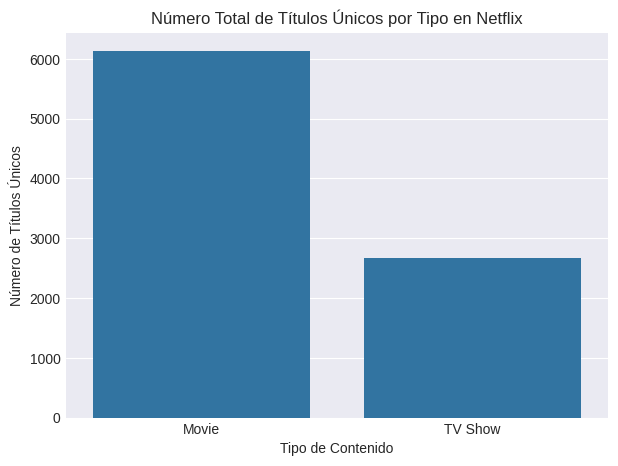

In [22]:
# Comparación del total de títulos por tipo
plt.figure(figsize=(7, 5))
sns.countplot(x='type', data=df_unique_titles)
plt.title('Número Total de Títulos Únicos por Tipo en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Número de Títulos Únicos')
plt.show()

Con este graficos de barras, podemos visualizar la contabilizacion total de peliculas y series que cargo Netflix segun nuestra base de datos, ambos numeros se pueden contrastar con el valor hayado en Looker Studio.

## Analisis de Tendencias Temporales

In [33]:
# FilFiltro las películas y TV shows con el año de lanzamiento directamente desde df_unique_titles
movies_temporal_df = df_unique_titles[
    (df_unique_titles['type'] == 'Movie') &
    (df_unique_titles['duration_type'] == 'min') ].copy()

tvshows_temporal_df = df_unique_titles[
    (df_unique_titles['type'] == 'TV Show') &
    (df_unique_titles['duration_type'].str.contains('Season', na=False)) ].copy()

# Calculo el promedio de duración por año de lanzamiento para películas
avg_movie_duration_by_year = movies_temporal_df.groupby('release_year')['duration_int'].mean().reset_index()

# Calcular el promedio de temporadas por año de lanzamiento para programas de TV
avg_tvshow_seasons_by_year = tvshows_temporal_df.groupby('release_year')['duration_int'].mean().reset_index()

# Utilizo la siguiente funcion de Matplotlib para determinar la gama de colores a utilizar en los graficos
plt.style.use('seaborn-v0_8-darkgrid')

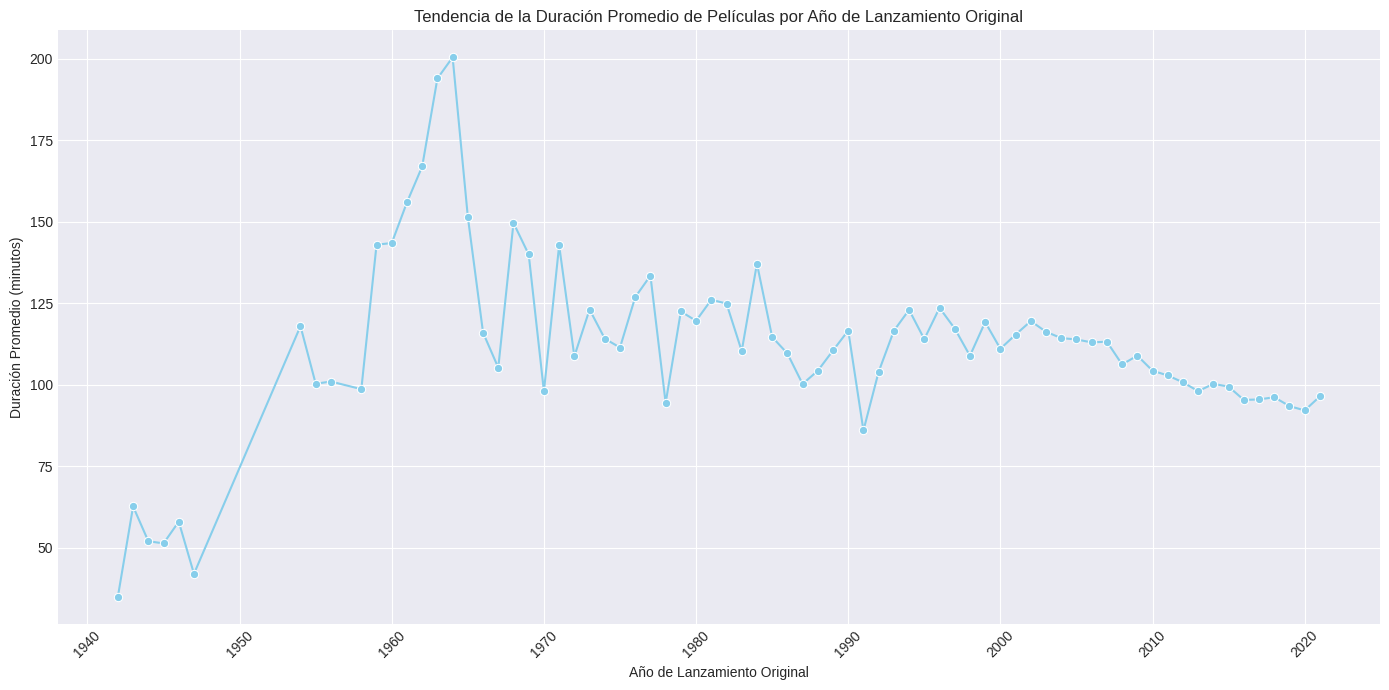

In [35]:
# Gráfico de tendencias para la duración promedio de películas
plt.figure(figsize=(14, 7))
sns.lineplot(x='release_year', y='duration_int', data=avg_movie_duration_by_year, marker='o', color='skyblue')
plt.title('Tendencia de la Duración Promedio de Películas por Año de Lanzamiento Original')
plt.xlabel('Año de Lanzamiento Original')
plt.ylabel('Duración Promedio (minutos)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis de la tendencia temporal para peliculas:

En este grafico se puede apreciar una gran variabilidad en la duración promedio de las películas sobre todo en el tramo que abarca la decada 40-70.

En el periodo de la decada 70-90 se observa una varabilidad mas acotada que va de una duracion de las peliculas de 150 a 100 minutos promedio.

Luego se visualiza una cierta estabilidad y una ligera tendencia bajista en los 90-20 alrededor de los 110-120 minutos promedio.

Conclusión: La duración promedio de las películas ha experimentado fluctuaciones significativas a lo largo de su historia, con un pico en los años 60 y una caida en la duracion posterior a este.

Por ultimo, se debe tener en cuenta de no caer en un sesgo por la falta de datos de las primeras 4 decadas.

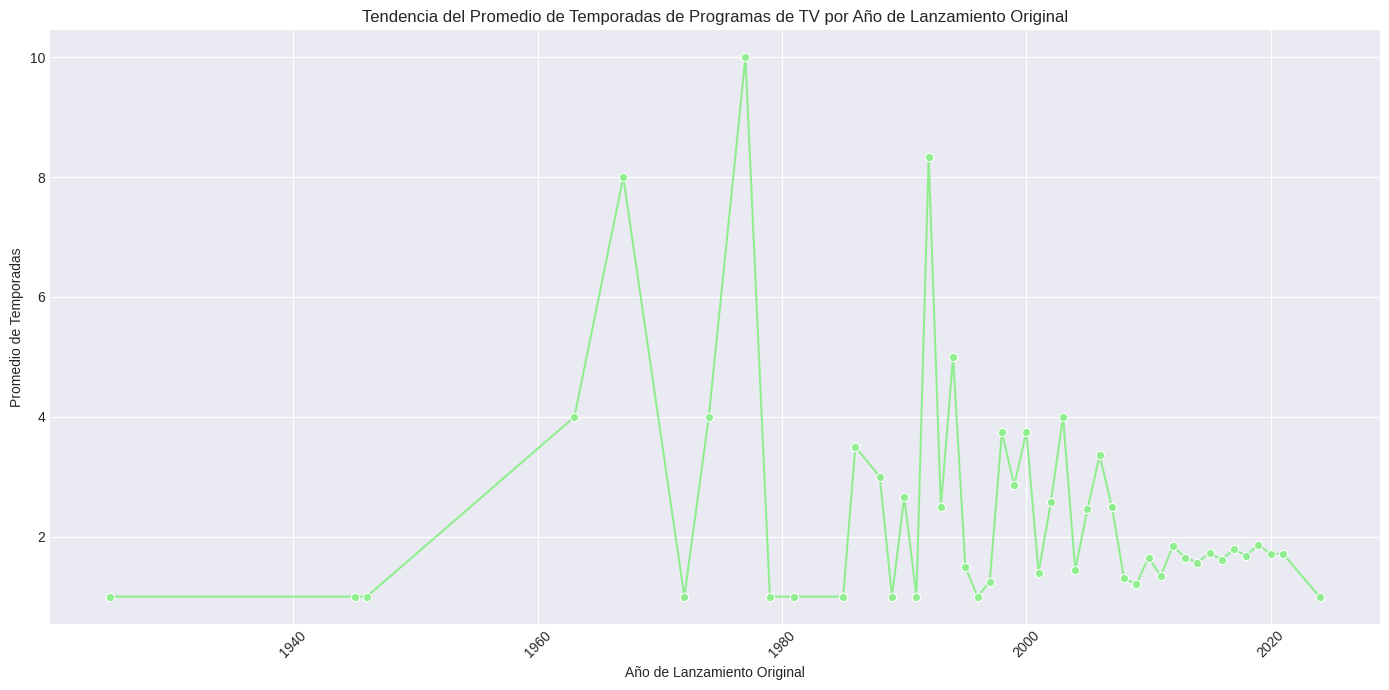

In [36]:
# Gráfico de tendencias para el promedio de temporadas de programas de TV
plt.figure(figsize=(14, 7))
sns.lineplot(x='release_year', y='duration_int', data=avg_tvshow_seasons_by_year, marker='o', color='lightgreen')
plt.title('Tendencia del Promedio de Temporadas de Programas de TV por Año de Lanzamiento Original')
plt.xlabel('Año de Lanzamiento Original')
plt.ylabel('Promedio de Temporadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis de la tendencia temporal para series:

Aqui se puede apreciar que hay una gran variabilidad entre la decada del 60-80, ya que hay presencia de picos que aluden a series con cantidad de temporadas superior a 4.

A partir de mediados de la decada de los 90 se puede visualizar una tendencia general a la baja en la cantidad de temporadas. Especialmente después de 2010, la línea muestra una tendencia a establecerse en un promedio muy bajo, casi siempre por debajo de las 2 temporadas, con algunas pequeñas fluctuaciones. Esto es coherente con el auge de las miniseries o las series de unica temporada.